In [78]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import pandas as pd
import numpy as np

In [80]:
df = pd.read_excel('/content/drive/MyDrive/Book1.xlsx',
                 
                 names=[
                        'sentences',
                        'label' 
                         ])
df.head()

,sentences,label
0,tweet,class
1,' #علمتني_الحياه أن الذين يعيشون على الأرض ليس...,pos
2,' #ميري_كرسمس كل سنة وانتم طيبين http://t.co/n...,pos
3,' و انتهى مشوار الخواجة ',neg
4,' مش عارف ابتدى مذاكره منين :/ ',neg


In [81]:
import matplotlib.font_manager as fm

font_path = "/content/drive/MyDrive/scheherazade/Scheherazade-2.100/Scheherazade-Bold.ttf"  
fm.fontManager.addfont(font_path)

In [82]:
!pip install arabic-reshaper
!pip install python-bidi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


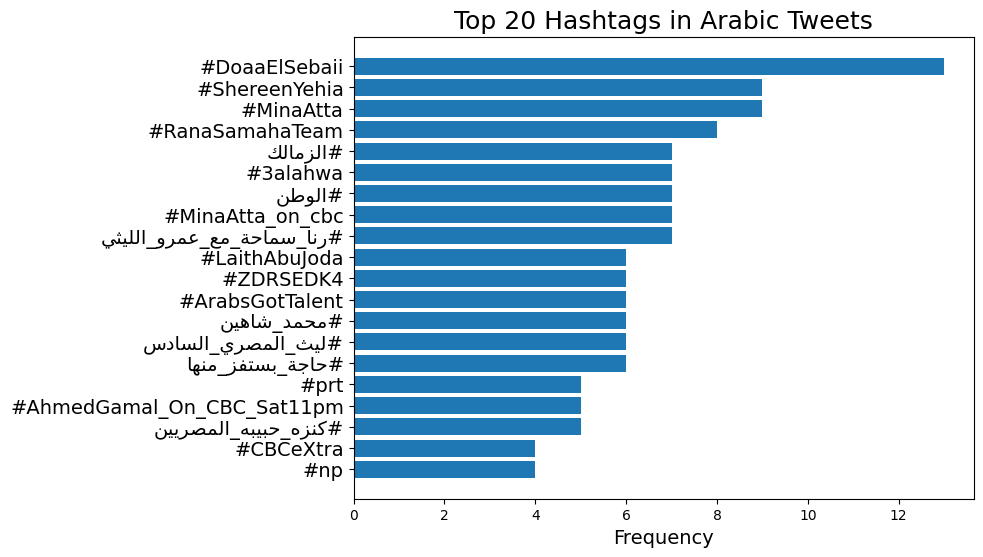

In [83]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Extract all hashtags from the 'sentences' column
all_hashtags = []
for sentence in df['sentences']:
    words = sentence.split()
    hashtags = [word for word in words if word.startswith('#')]
    all_hashtags.extend(hashtags)

# Count the frequency of each hashtag
hashtag_freq = Counter(all_hashtags)

# Get the top 20 most common hashtags
top_hashtags = hashtag_freq.most_common(20)

# Re-shape and display each hashtag using arabic_reshaper and bidi.algorithm
reshaped_hashtags = [get_display(arabic_reshaper.reshape(hashtag)) for hashtag, freq in top_hashtags]

# Plot the top hashtags using a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(range(len(top_hashtags)), [freq for hashtag, freq in top_hashtags], align='center')
ax.set_yticks(range(len(top_hashtags)))
ax.set_yticklabels(reshaped_hashtags, fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency', fontsize=14)
ax.set_title('Top 20 Hashtags in Arabic Tweets', fontsize=18)
plt.show()

In [84]:
# combine all the preprocessed tweets into a single string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
all_text = " ".join(df["sentences"])

# tokenize the text into individual words
words = word_tokenize(all_text)

# get the number of words
num_words = len(words)

print("Number of words in the dataset:", num_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of words in the dataset: 32597


In [85]:
# define a regular expression pattern to match English words

import re
import string

english_pattern = re.compile(r'\b\w*[a-zA-Z]+\w*\b')

# remove all English words from the 'text' column
df['sentences'] = df['sentences'].apply(lambda x: re.sub(english_pattern, '', str(x)))
# Define a function to remove numbers and punctuation from a given string

df.head(60)


,sentences,label
0,,class
1,' #علمتني_الحياه أن الذين يعيشون على الأرض ليس...,pos
2,' #ميري_كرسمس كل سنة وانتم طيبين ://./ ',pos
3,' و انتهى مشوار الخواجة ',neg
4,' مش عارف ابتدى مذاكره منين :/ ',neg
5,' @ إختصروا الطريق بدلا من إختيار المنصف ثم ا...,neg
6,' إذ خانت المرأة فهي تبحث عن الإهتمام .. و إذ ...,neg
7,' يا حبيبتي البعد ناار قلبي داب من الانتظار ♡ ',pos
8,"' """"""يا سامحك الله، من علّمك أن تكون خيبة؟"""""""" '",neg
9,' خى مالها قفلت من كل حتة كده لييه ! ',neg


In [86]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('arabic')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading arabic: Package 'arabic' not found in index


False

In [87]:
df['sentences'] = df['sentences'].str.replace('http\S+|www.\S+|@\S+|@', '', case=False)
df.head()

<ipython-input-87-2ee220ba9b24>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentences'] = df['sentences'].str.replace('http\S+|www.\S+|@\S+|@', '', case=False)


,sentences,label
0,,class
1,' #علمتني_الحياه أن الذين يعيشون على الأرض ليس...,pos
2,' #ميري_كرسمس كل سنة وانتم طيبين ://./ ',pos
3,' و انتهى مشوار الخواجة ',neg
4,' مش عارف ابتدى مذاكره منين :/ ',neg


In [88]:
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\u2665" # heart symbol
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emojis(df.iloc[1]['sentences'])
df.head(120)

,sentences,label
0,,class
1,' #علمتني_الحياه أن الذين يعيشون على الأرض ليس...,pos
2,' #ميري_كرسمس كل سنة وانتم طيبين ://./ ',pos
3,' و انتهى مشوار الخواجة ',neg
4,' مش عارف ابتدى مذاكره منين :/ ',neg
...,...,...
115,' تمام انا محتاجة النسخة الكاملة من اكتاب ضر...,neu
116,' فندق اتلانتس ',neu
117,' سألوا العرص : هل تعلم نسبة البطالة في مصر ؟؟...,neg
118,' شاي و بسكويت للمره الرابعه علي التوازي ..^_^ ',neu


In [89]:
def remove_special_symbols(text):
    # Remove non-alphanumeric characters, but keep Arabic characters
    text = re.sub(r'[^\w\s\u0600-\u06FF]', '', text, flags=re.UNICODE)
    return text

df['sentences'] = df['sentences'].apply(remove_special_symbols)
df.head(60)


,sentences,label
0,,class
1,علمتني_الحياه أن الذين يعيشون على الأرض ليسوا...,pos
2,ميري_كرسمس كل سنة وانتم طيبين,pos
3,و انتهى مشوار الخواجة,neg
4,مش عارف ابتدى مذاكره منين,neg
5,إختصروا الطريق بدلا من إختيار المنصف ثم الا...,neg
6,إذ خانت المرأة فهي تبحث عن الإهتمام و إذ خان...,neg
7,يا حبيبتي البعد ناار قلبي داب من الانتظار,pos
8,يا سامحك الله، من علّمك أن تكون خيبة؟,neg
9,خى مالها قفلت من كل حتة كده لييه,neg


In [90]:
# combine all the sentences into a single string
all_sentences = " ".join(df["sentences"].astype(str))

# tokenize the text into individual words
words = word_tokenize(all_sentences)

# create a frequency distribution of the words
fdist = FreqDist(words)

# print the most common words
print(fdist.most_common(10))

[('من', 360), ('و', 298), ('في', 253), ('يا', 183), ('الله', 173), ('كل', 157), ('على', 152), ('مش', 152), ('انا', 146), ('ما', 132)]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


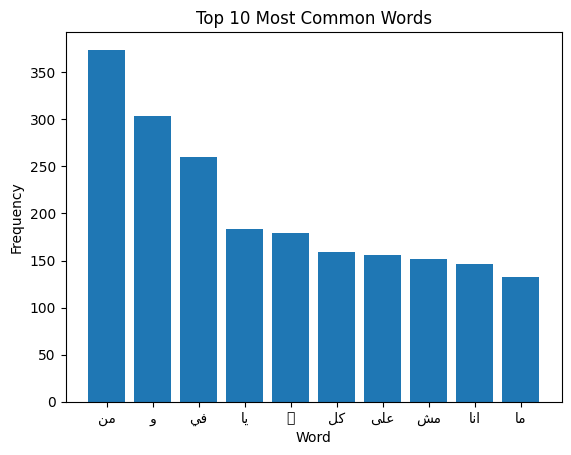

In [91]:
from collections import Counter
import matplotlib.pyplot as plt
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from matplotlib.font_manager import FontProperties

# Assume 'df' is your preprocessed dataset with a column named 'sentences'
all_words = []
for sentence in df['sentences']:
    # convert Arabic text to correct format for plotting
    sentence = reshape(sentence)
    sentence = get_display(sentence)
    # split sentence into words
    words = sentence.split()
    all_words.extend(words)

# Count the frequency of each word
word_freq = Counter(all_words)

# Get the top 10 most common words
top_words = word_freq.most_common(10)

# Plot the top 10 words using a bar chart
plt.rcParams["font.family"] = "DejaVu Sans"
plt.bar(range(len(top_words)), [freq for word, freq in top_words], align='center')
plt.xticks(range(len(top_words)), [word for word, freq in top_words])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.show()

In [92]:
import nltk
from nltk.tokenize import TweetTokenizer


nltk.download('punkt')

tokenized_tweets = []

for tweet in df['sentences']:
    tokens = word_tokenize(tweet)
    tokenized_tweets.append(tokens)

df['tokenized_tweets'] = tokenized_tweets
    






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [93]:
df.head()

,sentences,label,tokenized_tweets
0,,class,[]
1,علمتني_الحياه أن الذين يعيشون على الأرض ليسوا...,pos,"[علمتني_الحياه, أن, الذين, يعيشون, على, الأرض,..."
2,ميري_كرسمس كل سنة وانتم طيبين,pos,"[ميري_كرسمس, كل, سنة, وانتم, طيبين]"
3,و انتهى مشوار الخواجة,neg,"[و, انتهى, مشوار, الخواجة]"
4,مش عارف ابتدى مذاكره منين,neg,"[مش, عارف, ابتدى, مذاكره, منين]"


In [94]:

from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('arabic')
# add custom stopwords
custom_stop_words = [ "؟", "،",  "انا",  "اللي", 'و', 'فى', 'على', 'ان' ]
stop_words.extend(custom_stop_words)

no_stopwords_tweets = []
for tweet in tokenized_tweets:
    no_stopwords_tokens = [token for token in tweet if token not in stop_words]
    no_stopwords_tweets.append(no_stopwords_tokens)

df['no_stopwords_tweets'] = no_stopwords_tweets
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentences,label,tokenized_tweets,no_stopwords_tweets
0,,class,[],[]
1,علمتني_الحياه أن الذين يعيشون على الأرض ليسوا...,pos,"[علمتني_الحياه, أن, الذين, يعيشون, على, الأرض,...","[علمتني_الحياه, يعيشون, الأرض, ملائكة, بشر, يص..."
2,ميري_كرسمس كل سنة وانتم طيبين,pos,"[ميري_كرسمس, كل, سنة, وانتم, طيبين]","[ميري_كرسمس, سنة, وانتم, طيبين]"
3,و انتهى مشوار الخواجة,neg,"[و, انتهى, مشوار, الخواجة]","[انتهى, مشوار, الخواجة]"
4,مش عارف ابتدى مذاكره منين,neg,"[مش, عارف, ابتدى, مذاكره, منين]","[مش, عارف, ابتدى, مذاكره, منين]"


In [95]:
import string
import re


# Define a function to remove numbers and punctuation from a given string
def remove_numbers_punctuation(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation.replace('_', '')))
    
    return text

df['no_stopwords_tweets'] = df['no_stopwords_tweets'].apply(lambda x: [remove_numbers_punctuation(token) for token in x])
df.head(60)





,sentences,label,tokenized_tweets,no_stopwords_tweets
0,,class,[],[]
1,علمتني_الحياه أن الذين يعيشون على الأرض ليسوا...,pos,"[علمتني_الحياه, أن, الذين, يعيشون, على, الأرض,...","[علمتني_الحياه, يعيشون, الأرض, ملائكة, بشر, يص..."
2,ميري_كرسمس كل سنة وانتم طيبين,pos,"[ميري_كرسمس, كل, سنة, وانتم, طيبين]","[ميري_كرسمس, سنة, وانتم, طيبين]"
3,و انتهى مشوار الخواجة,neg,"[و, انتهى, مشوار, الخواجة]","[انتهى, مشوار, الخواجة]"
4,مش عارف ابتدى مذاكره منين,neg,"[مش, عارف, ابتدى, مذاكره, منين]","[مش, عارف, ابتدى, مذاكره, منين]"
5,إختصروا الطريق بدلا من إختيار المنصف ثم الا...,neg,"[إختصروا, الطريق, بدلا, من, إختيار, المنصف, ثم...","[إختصروا, الطريق, بدلا, إختيار, المنصف, الانقل..."
6,إذ خانت المرأة فهي تبحث عن الإهتمام و إذ خان...,neg,"[إذ, خانت, المرأة, فهي, تبحث, عن, الإهتمام, و,...","[خانت, المرأة, فهي, تبحث, الإهتمام, خان, الرجل..."
7,يا حبيبتي البعد ناار قلبي داب من الانتظار,pos,"[يا, حبيبتي, البعد, ناار, قلبي, داب, من, الانت...","[حبيبتي, البعد, ناار, قلبي, داب, الانتظار]"
8,يا سامحك الله، من علّمك أن تكون خيبة؟,neg,"[يا, سامحك, الله،, من, علّمك, أن, تكون, خيبة؟]","[سامحك, الله،, علّمك, تكون, خيبة؟]"
9,خى مالها قفلت من كل حتة كده لييه,neg,"[خى, مالها, قفلت, من, كل, حتة, كده, لييه]","[خى, مالها, قفلت, حتة, كده, لييه]"


In [96]:
# convert each list of preprocessed tweets to a string
df["no_stopwords_tweets"] = df["no_stopwords_tweets"].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# combine all the preprocessed tweets into a single string
all_text = " ".join(df["no_stopwords_tweets"])

# tokenize the text into individual words
words = word_tokenize(all_text)

# get the number of words
num_words = len(words)

print("Number of words in the dataset:", num_words)
#In this code snippet, replace "mydataset.csv" with the filename and filepath of your actual dataset. The code first reads in the dataset using pandas. Then, the apply method is used to convert each list of preprocessed tweets to a string, using a lambda function that checks if the item is a list before joining its elements with a space. After converting all the items to strings, the join method is used to combine all of the preprocessed tweets into a single string. The word_tokenize method from NLTK is then used to tokenize the text into individual words, and the length of the resulting list is calculated to get the total number of words in the dataset.








Number of words in the dataset: 16937


In [97]:
# convert each cleaned tweet string back to a list of words
df["no_stopwords_tweets"] = df["no_stopwords_tweets"].apply(lambda x: x.split() if isinstance(x, str) else x)

# create a list of all cleaned tweets
cleaned_tweets_list = df["no_stopwords_tweets"].tolist()

print("Number of tweets in the dataset:", len(cleaned_tweets_list))

Number of tweets in the dataset: 2060


In [ ]:
df.head(60)

In [99]:
from nltk.probability import FreqDist
# convert each list of preprocessed tweets to a string
df["no_stopwords_tweets"] = df["no_stopwords_tweets"].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# combine all the preprocessed tweets into a single string
all_text = " ".join(df["no_stopwords_tweets"])

# tokenize the text into individual words
words = word_tokenize(all_text)

# create a frequency distribution of the words
fdist = FreqDist(words)

# print the most common words
print(fdist.most_common(15))


[('الله', 173), ('مش', 152), ('علي', 73), ('حد', 57), ('عشان', 55), ('الناس', 53), ('ربنا', 49), ('انت', 49), ('ده', 47), ('ايه', 43), ('اللى', 42), ('يارب', 42), ('اللهم', 42), ('دا', 39), ('مصر', 36)]


In [100]:
# count the number of tweets in each sentiment class
pos_count = len(df[df['label'] == 'pos'])
neg_count = len(df[df['label'] == 'neg'])
neutral_count = len(df[df['label'] == 'neu'])

# calculate the percentage of tweets in each class
total_count = pos_count + neg_count + neutral_count
pos_percent = pos_count / total_count * 100
neg_percent = neg_count / total_count * 100
neutral_percent = neutral_count / total_count * 100

# print the results
print('Positive tweets number : {:.2f}'.format(pos_count))
print('Negative tweets number : {:.2f}'.format(neg_count))
print('Neutral tweets number : {:.2f}'.format(neutral_count))

print('Positive tweets percentage: {:.2f}%'.format(pos_percent))
print('Negative tweets percentage: {:.2f}%'.format(neg_percent))
print('Neutral tweets percentage: {:.2f}%'.format(neutral_percent))

Positive tweets number : 792.00
Negative tweets number : 677.00
Neutral tweets number : 590.00
Positive tweets percentage: 38.47%
Negative tweets percentage: 32.88%
Neutral tweets percentage: 28.65%


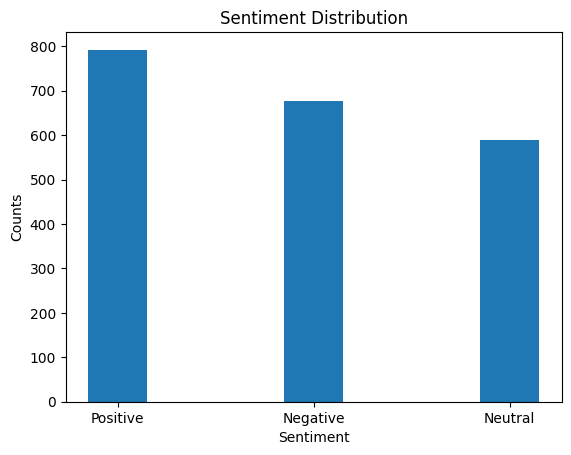

In [107]:
import matplotlib.pyplot as plt

# create a list of sentiment labels and percentages
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [pos_count, neg_count, neutral_count]

# create a bar chart
plt.bar(sentiments, counts, width=0.3)

# add title and axis labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

# show the plot
plt.show()

In [120]:
import matplotlib.font_manager as fm

font_path = "/content/drive/MyDrive/Amiri/Amiri-Regular.ttf"  
fm.fontManager.addfont(font_path)

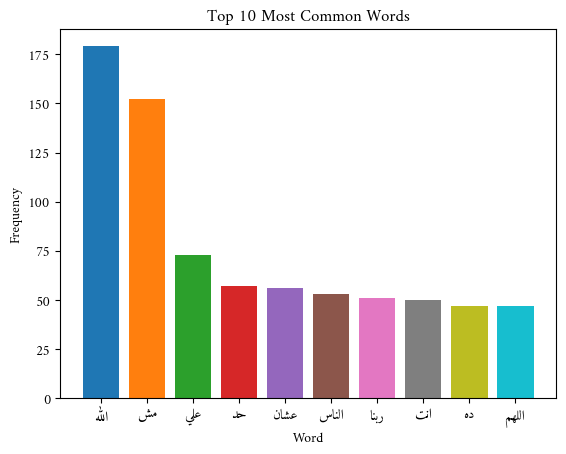

In [121]:
from collections import Counter
import matplotlib.pyplot as plt
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from matplotlib.font_manager import FontProperties



all_words = []
for sentence in df['no_stopwords_tweets']:
    # convert Arabic text to correct format for plotting
    sentence = reshape(sentence)
    sentence = get_display(sentence)
    # split sentence into words
    words = sentence.split()
    all_words.extend(words)

# Count the frequency of each word
word_freq = Counter(all_words)

# Get the top 10 most common words
top_words = word_freq.most_common(10)

# Plot the top 10 words using a bar chart
fig, ax = plt.subplots()
plt.rcParams["font.family"] = "Amiri"
for i, (word, freq) in enumerate(top_words):
    bar = ax.bar(i, freq, align='center')
    #if word == "اللّه":
    #bar[0].set_fontproperties(FontProperties(fname=font_path))
    ax.set_xticks(range(len(top_words)))
    ax.set_xticklabels([word for word, freq in top_words])
    ax.set_xlabel('Word')
    ax.set_ylabel('Frequency')
    ax.set_title('Top 10 Most Common Words')

plt.show()

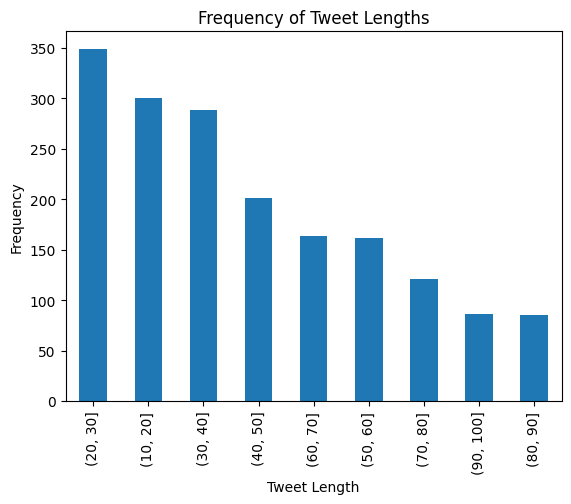

In [103]:
import matplotlib.pyplot as plt

# Assume 'df' is your preprocessed dataset with a column named 'text'
df['tweet_len'] = df['no_stopwords_tweets'].apply(len)

# Define the bin ranges for tweet lengths
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Bin the tweet lengths into the defined ranges and count the frequency of each range
freq = pd.cut(df['tweet_len'], bins=bins).value_counts()

# Plot the frequency of each range using a bar plot
freq.plot(kind='bar')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Frequency of Tweet Lengths')
plt.show()